# PyTorch Intro Workshop
### Introduction
Welcome to the PSIML's PyTorch Intro Workshop. 
#### Goals
In this workshop you will use some of the common functionalities of PyTorch to:
1. replicate common NumPy functionalities,
2. extend them using 'device' and 'AutoGrad'
3. implement a simple dataloading pipeline.

### Key Ingredients
* Tensors (think of them as numpy arrays and more!)
    *  creating tensors
    *  tensor operators
    *  indexing and slicing
    *  view instead of reshape
    *  device ("cpu", "cuda")
    *  autograd
* Datasets and Dataloaders (data wrappers that facilitate data manipulation, modularity and parallelism)
    * map style dataset: implement '\_\_len\_\_' and '\_\_getitem\_\_'
        * or iterator style dataset: implement '\_\_iter\_\_'
    * sampling and batching
    * simple parallelism using 'num_workers'

In [1]:
# Some useful imports
import numpy as np
import torch

## Tensors

When unsure, always check the docs:
https://pytorch.org/docs/stable/tensors.html

### Creating tensors

In [2]:
# PyTorch Tensor is in many ways equivalent to numpy NDArrays
# Let's create some tensors
e1 = torch.Tensor()  # an empty tensor
print(e1)

e2 = torch.empty(5, 3)  # allocates memory but the values are undefined
print(e2)

x = torch.ones(3,4)  # a tensor of ones
print(x)

tensor([])
tensor([[-2.2178e-07,  4.5262e-43, -2.2178e-07],
        [ 4.5262e-43, -2.2178e-07,  4.5262e-43],
        [-2.2178e-07,  4.5262e-43, -2.2174e-07],
        [ 4.5262e-43, -2.2179e-07,  4.5262e-43],
        [-2.2172e-07,  4.5262e-43, -2.2172e-07]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [3]:
### COMPLETE THE CODE BELOW
x_len = None  # get the lenght (size of first dimension) of tensor x
print(x_len)

x_shape = None  # get the shape/size of tensor x (.shape is the alias for .size(), you can use either)
x_size = None   # note that in pytorch .size() has different meaning than .size in numpy
print(x_shape)
print(x_size)

x_ndim = None  # get the dimensionality of tensor x
print(x_ndim)

None
None
None
None


In [4]:
### COMPLETE THE CODE BELOW

t1 = None  # a tensor of ones with shape (4,4)
print(t1)

t2 = None  # a tensor of zeros with shape (1,2,3)
print(t2)

torch.manual_seed(0)  # random generator seed - for reproducibility set the seed to 0
t3 = None  # a tensor of numbers from uniform [0,1) distribution with shape (5,2)
print(t3)

torch.manual_seed(0)  # random generator seed - for reproducibility set the seed to 0
t4 = None  # a tensor of numbers from standard normal distribution with shape (10,3)
print(t4)

None
None
None
None


In [5]:
# You can also create tensors by converting the already familiar numpy arrays or even lists to tensors
list_array = [[0.1, 0.2, 0.3],[1, 2, 3]]
print(list_array)

np_array = np.asarray(list_array)
print(np_array)

torch_tensor_from_list = torch.tensor(list_array)
print(torch_tensor_from_list)

torch_tensor_from_np = torch.from_numpy(np_array)  # note that you can also do torch.tensor(np_array)
print(torch_tensor_from_np)

# If you want to convert back to numpy
np_array_from_torch = torch_tensor_from_np.numpy()  # easy-peasy :)
print(np_array_from_torch)

[[0.1, 0.2, 0.3], [1, 2, 3]]
[[0.1 0.2 0.3]
 [1.  2.  3. ]]
tensor([[0.1000, 0.2000, 0.3000],
        [1.0000, 2.0000, 3.0000]])
tensor([[0.1000, 0.2000, 0.3000],
        [1.0000, 2.0000, 3.0000]], dtype=torch.float64)
[[0.1 0.2 0.3]
 [1.  2.  3. ]]


In [6]:
### COMPLETE THE CODE BELOW

np.random.seed(0)  # random generator seed - for reproducibility set the seed to 0
n1 = None  # a numpy array of random integers from [0,10] with shape (5,5)1
print(n1)

t1 = None  # convert n1 to torch.tensor
print(t1)

n2 = None  # convert t1 back to numpy array
print(n2)

None
None
None


In [7]:
# You can set the type for the tensor data at creation time or change them later using 'dtype'
x_int = torch.tensor([1,2,3], dtype=torch.int32)
print(x_int)

x_float = x_int.to(dtype=torch.float64)
print(x_float)

tensor([1, 2, 3], dtype=torch.int32)
tensor([1., 2., 3.], dtype=torch.float64)


In [8]:
### COMPLETE THE CODE BELOW

a1 = [[0.1, 1.2, 2.3],[3.4, 4.5, 5.6]]
print(a1)

t1 = None  # convert a1 to torch.tensor
print(t1)

t2 = None  # change the type of t1 to 16-bit integer
print(t2)

[[0.1, 1.2, 2.3], [3.4, 4.5, 5.6]]
None
None


In [9]:
# You can also create a tensor based on an existing tensor using new_* methods (they take size as argument)
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)

y = x.new_ones(x.size())  # a tensor of ones with the size and type of x
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 1, 1],
        [1, 1, 1]])


In [10]:
### COMPLETE THE CODE BELOW

z = None  # a tensor of zeros with the size and type of x
print(z)

z1 = None  # a tensor of ones with the type of x and size 1 x 2nd-dimenson-of-x
print(z1)

None
None


### Indexing and Slicing
Exactly the same as in numpy.

When unsure, always check the docs:
https://numpy.org/doc/1.18/reference/arrays.indexing.html

In [11]:
# Let's start with a tensor x containing a representation for a batch of 4 2x2 RGB images
batch_size = 4
channels = 3  # lets say that the channels are in order of (Red, Green, Blue)
height = 2
width = 2

torch.manual_seed(0)  # random generator seed - for reproducibility set the seed to 0
x = torch.randint(low=0, high=256, size=(batch_size, channels, height, width))

In [12]:
### COMPLETE THE CODE BELOW

x_first = None  # first image
print (x_first)

x_last_r = None  # only the red channel of the last image
print(x_last_r)

x_1_1_blue = None  # first blue pixel of every image in the batch
print(x_1_1_blue)

None
None
None


### View and Reshape
Mostly similar to numpy.reshape() with some quirks.

When unsure, always check the docs:
https://pytorch.org/docs/stable/tensor_view.html#tensor-view-doc

In [13]:
# Let's start again with a tensor containing a representation for a batch of 4 images
batch_size = 4
channels = 3  # lets say that the channels are in order of (Red, Green, Blue)
height = 2
width = 2

torch.manual_seed(0)  # random generator seed - for reproducibility set the seed to 0
x = torch.randint(low=0, high=256, size=(batch_size, channels, height, width))

In [14]:
### COMPLETE THE CODE BELOW
x_flattened = None  # replace the height, width and channel dimensions with a single dimension 
                    # -> (batch_size, channels*height*width)
print(x_flattened)

x_channels = None  # starting from x_flattened add the channels dimension back
                   # -> (batch_size, channels, height*width)
print(x_channels)

None
None


### Device (NOTE: you will need a gpu with cuda in order to complete this cell)
This is where we start seeing the usefulness of PyTorch. Move your data and variables to the GPU and exploit its computational capabilities to speed up your deep learning dozens of times. :)

When unsure, always check the docs: https://pytorch.org/docs/stable/cuda.html


In [15]:
# Lets make some tensors again and see how we can move our data and computations to the GPU

x = torch.tensor([[0.5, 0.2], [0.2, 0.5]])
print(x)
print('CUDA available:', torch.cuda.is_available())
print('I have', torch.cuda.device_count(), 'GPU(s)')
print('Current GPU ID:', torch.cuda.current_device())  # if you have more GPUs you can change the current
                                                       # device context with torch.cuda.device(device)
print('Current GPU Name:', torch.cuda.get_device_name(), '\n')
    
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object (usually your GPU:0, but you can change that)
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings .to("cuda")
    z = x + y                              # computation happens on GPU since both x and y are in GPU memory
    print(z)                               # result of the computation z is also on GPU. Bring it back to RAM using .to()
    print(z.to("cpu", torch.double))       # .to() can also change the dtype as before!    

tensor([[0.5000, 0.2000],
        [0.2000, 0.5000]])
CUDA available: True
I have 1 GPU(s)
Current GPU ID: 0
Current GPU Name: GeForce GTX 1060 

tensor([[1.5000, 1.2000],
        [1.2000, 1.5000]], device='cuda:0')
tensor([[1.5000, 1.2000],
        [1.2000, 1.5000]], dtype=torch.float64)


In [16]:
### COMPLETE THE CODE BELOW
device = None  # set the device to use your gpu

torch.manual_seed(0)  # random generator seed - for reproducibility set the seed to 0
a = None  # a tensor of numbers from uniform distribution with size (10, 4)
print(a)
b = None  # a tensor of ones with size (4,1) with the same data type as a
print(b)

# move a and b to gpu
a_gpu = None
print(a_gpu)
b_gpu = None
print(b_gpu)

c_gpu = None # multiply a_gpu and b_gpu via matrix multiplication and confirm that your coutput is on gpu
print(c_gpu)

c_cpu = None # move the variable c_gpu to cpu and confirm that it is not on gpu anymore
print(c_cpu.device)

None
None
None
None
None


AttributeError: 'NoneType' object has no attribute 'device'

### AutoGrad
Another very very useful functionality of PyTorch is the AutoGrad. As the name suggests, it allows you to automatically compute the gradients of variables in your graph. Let's see some examples.


In [19]:
# Let's create some tensors and set requires_grad to True to enable AutoGrad (automatic gradient computation)
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad)  # None - because we havent done any computations yet

# Now let's do some calculations and the get our gradients 
y = x + 2
print(y)
print(y.grad_fn)
z = y * y * 3 
out = z.mean() 
print(z, out)

### COMPLETE THE CODE BELOW

pass # compute the gradients of 'out' tensor using the .backward() 
     # AutoGrad will then compute partial derivatives of out with respect to every tensor 
     # that is involved in the computatinal graph of 'out' and also has 'requires_grad=True'.
     # You then can access gradients of out with respect to such tensor x using 'x.grad'
     # For convenience here is the analytic solution for gradient of 'out' with respect to 'x'
     # out = 1/4 * sum(3*(x_i+2)^2) | dout/dx_i = 3/2*(x_i+2) = 4.5
x_grad = None  # get the gradients of 'x'
print(x_grad)

# Note that tensor.backward() is a shortcut for tensor.backward(torch.Tensor([1])). 
# Therefore, it is only valid if the said tensor contains a single element.

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
None


In [20]:
### COMPLETE THE CODE BELOW

# let's try some more computations with x
y = x + 5
z = x * y * 3 
out2 = z.sum() 

pass

pass  # compute the gradients of 'out2' tensor
      # For convenience here is the analytic solution for gradient of 'out2' with respect to 'x'
      # out = sum(3*x_i*(x_i+5)) | dout/dx_i = 3*(2*x_i+5) = 21

x_grad = None  # get the gradients of 'x'
print(x.grad)

# Remember to zero out the gradients before every '.backward()' call or AutoGrad 
# will keep accumulating the gradients

# Note: If this still looks tedious, do not worry, this is just a brief look under the hood and
# most of it is automated by higher level classes and functions when you actually train a model. :)

None


## Dataset and Dataloader
PyTorch datasets present a nice functionality to handle data loading and preprocessing as well as being the segue to PyTorch Dataloaders that handle sampling, batching and parallelism.

When unsure, alsways check the docs: https://pytorch.org/docs/stable/data.html


In [21]:
# Some useful imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

[59.5 57.1]
[18.10003069 32.67839925]


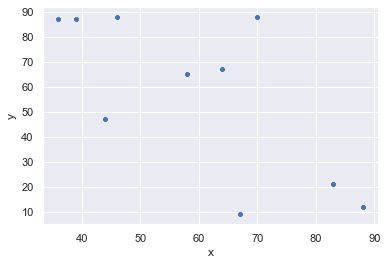

In [22]:
# Let's create some data and calculate some basic statistics
# Data: 10 2-dimensional integer vectors from 0 to 100
np.random.seed(seed=0)  # random generator seed - for reproducibility set the seed to 0
data = pd.DataFrame(np.random.randint(low=0, high=100+1, size=(10,2)), columns = ['x','y'])
sb.scatterplot(x="x", y="y", data=data)
mean = data.mean().to_numpy()
print(mean)
std = data.std().to_numpy()
print(std)

In [23]:
# So, let's create our own simple pytorch Dataset to see how it all works out
# A map style dataset needs __len__() and __getitem__() methods overwritten 

### COMPLETE THE CODE BELOW

class Simple_Dataset(torch.utils.data.Dataset):
    """Wraps a DataFrame and adds some transforms"""
    def __init__(self, data, transform=None):
        """
        Args:
            data (pd.DataFrame): pandas DataFrame object
            transform (callable, optional): transform to be applied on a sample.
        """
        self.data = data
        self.transform = transform

    def __len__(self):
        pass  # return the length of your dataset

    def __getitem__(self, idx):
        sample = None # get a row of 'self.data' at index 'idx' (use .iloc) as a numpy array 
        sample = None # convert the numpy array to pytorch tensor with type 'double'
        if self.transform:
            # This is where we apply some preprocessing transformations and/or augmentations to our data
            sample = self.transform(sample)
            
        return sample # finaly we return one sample from our dataset at given index
    
# Let's now define a very simple normalization transform: x = (x-mean)/std
class Normalization_Transform(object):
    # First we need to initialize the transform object with the parameters necessary to perform the transformation
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        pass  # return the required normalization transform

In [24]:
### COMPLETE THE CODE BELOW
# let's create the normalization transformation for our simple data of 2 dimensional vectors (defined above)
normalization_transform = Normalization_Transform(mean, std)

# Now let's instance our dataset providing the normalization transform to it 
# and then get we will get some samples from it using the pytorch dataloader
our_dataset = Simple_Dataset(data=data, transform=normalization_transform)

In [25]:
# Here is the dataloader with the default parameters. You can run the following code as is.
# Then, you should try increasing the batch size to 5 and turning the shuffling on.
our_dataloader = torch.utils.data.DataLoader(dataset=our_dataset,
                                             batch_size=1, shuffle=False, sampler=None,
                                             batch_sampler=None, num_workers=0, collate_fn=None,
                                             pin_memory=False, drop_last=False, timeout=0,
                                             worker_init_fn=None)
# This is basically one full epoch:
for batch in our_dataloader:
    # Do something with your batch
    batch = batch.to(device)  # we generally want to do our training on the GPU 
                              # (remember that we set our device to torch.device("cuda") earlier)
    print(batch)

TypeError: 'NoneType' object cannot be interpreted as an integer

In [26]:
# Now we will take a deeper look at some of the parameters of the DataLoader to see
# how they can be useful to us. Specifically we will focus on most common scenarios 
# and give hints for the less common ones.


### Sampling

torch.utils.data.Sampler classes are used to specify the sequence of indices/keys used in data loading. They represent iterable objects over the indices to datasets. 
* when sampler and batched_sampler is None a Sampler will be constructed automatically based on the shuffle parameter
    * shuffle=False - data is sampled in order they are in the dataset
    * shuffle=True - indices of the dataset (from 0 to len(dataset)-1) are shuffled and then sampled sequentially
* if more control over sampling is needed you can specify a sampler object to 
    * decide if the sampling is done with or without replacement
    * specify a distribution over samples in case of non-uniform (weighted) sampling
    

### Batching 

If you tried increasing the batch more than 1 you saw that the dataloader returns a 'batched' tensor
for each batch. This means that the 'batch_size' samples will be taken from our dataset and 
grouped together into a single tensor which improves computation speed of the models we pass this batch to.
This is called automatic batching and what it does is basically concatenating the samples of a batch into
a pytorch tensors. That in turn requires the sample tensors to be of same size (which is often true). 

In case you need a custom made batch you can write a 'collate_fn' that does more than just 
concatenating the sample tensors. E.g. filtering bad samples, padding/trimming sequences to 
fit desired size, etc. 

If the size of your dataset is not divisible by your 'batch_size', the last batch of your dataloader will
not be full. In case your model requires a full batch, you can simply discard the last batch by setting the
'drop_last' parameter to True.


### Parallelism
With default parameters, the dataloader will spawn a single process that loads your data. In case that the dataloading is a bottleneck of your system a simple and efficient speedup can be achieved by increasing the num_workers parameter. Instead of one, the dataloader will now spawn num_workers processes and each process will be collecting a single batch of data and returning it once it's done.

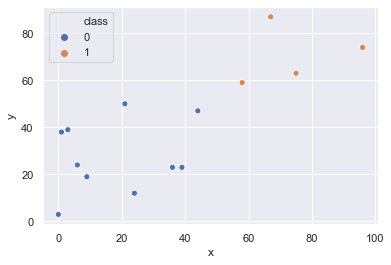

In [27]:
# Let's create another dataset that will have a problem of imballanced classes.
# Then we will use a weighted sampler to fix the problem.

np.random.seed(seed=0)  # random generator seed - for reproducibility set the seed to 0
class0_data = pd.DataFrame(np.random.randint(low=0, high=50+1, size=(10,2)), columns = ['x','y'])
class1_data = pd.DataFrame(np.random.randint(low=50, high=100+1, size=(4,2)), columns = ['x','y'])
class0_data['class'] = 0
class1_data['class'] = 1
data = pd.concat([class0_data, class1_data])
sb.scatterplot(x="x", y="y", data=data, hue=data['class'], )

In [28]:
# create a dataset (this time we will skip creating the transforms)
our_dataset = Simple_Dataset(data=data, transform=None)

### COMPLETE THE CODE BELOW
weights = None  # calculate the weights for each sample to solve the imbalance problem as 1/classX_num_samples
print(weights)

dataset_size = None  # set the desired dataset size, e.g. 20

weighted_sampler = None  # instance a weighted sampler (torch.utils.data.WeightedRandomSampler), 
                         # set the num_samples to dataset_size and replacement to True if your dataset_size variable 
                         # is larger than your actual dataset.

[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.25 0.25 0.25 0.25]


In [29]:
### COMPLETE THE CODE BELOW

# Here is the dataloader with our weighted_sampler. You can run the following code as is.
# Note that you won't be using the shuffle parameter anymore as setting the sampler overrules it.

# Try changing the following parameters along with the parameters of your weighted_sampler 
# and try to predict what will happen:
# - batch_size
# - drop_last
# - num_workers
our_dataloader = torch.utils.data.DataLoader(dataset=our_dataset,
                                             batch_size=3, shuffle=None, sampler=weighted_sampler,
                                             batch_sampler=None, num_workers=0, collate_fn=None,
                                             pin_memory=False, drop_last=False, timeout=0,
                                             worker_init_fn=None)
# This is basically one full epoch:
for batch in our_dataloader:
    # Do something with your batch
    batch = batch.to(device)  # we generally want to do our training on the GPU 
                              # (remember that we set our device to torch.device("cuda") earlier)
    print(batch)

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>

# Congratulations!!!